Logistic Regression Model for Building Destruction Classification

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


We start by reading data in from the cal_fire_data_cleaned CSV file:

In [56]:
cal_fire_data = pd.read_csv("../data/cal_fire_data_cleaned.csv")
cal_fire_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42789 entries, 0 to 42788
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   * Structure Type                             42789 non-null  object 
 1   * Roof Construction                          42789 non-null  object 
 2   * Eaves                                      42789 non-null  object 
 3   * Vent Screen                                42789 non-null  object 
 4   * Exterior Siding                            42789 non-null  object 
 5   * Window Pane                                42789 non-null  object 
 6   * Deck/Porch On Grade                        42789 non-null  object 
 7   * Deck/Porch Elevated                        42789 non-null  object 
 8   * Patio Cover/Carport Attached to Structure  42789 non-null  object 
 9   * Fence Attached to Structure                42789 non-null  object 
 10

We perform one-hot encoding on our categorical features to make them usable by the model:

In [57]:
original_columns = cal_fire_data.columns
cal_fire_data = pd.get_dummies(cal_fire_data, columns=cal_fire_data.select_dtypes('object').columns, drop_first=True)
cal_fire_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42789 entries, 0 to 42788
Data columns (total 49 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Assessed Improved Value (parcel)                                    42789 non-null  float64
 1   Latitude                                                            42789 non-null  float64
 2   Longitude                                                           42789 non-null  float64
 3   Age                                                                 42789 non-null  float64
 4   Destroyed                                                           42789 non-null  int64  
 5   * Structure Type_Commercial Building Multi Story                    42789 non-null  bool   
 6   * Structure Type_Commercial Building Single Story                   42789 non-null  bool   
 7   * Structure T

We set our feature and target variables and create a train/test split (80%/20%):

In [58]:
from sklearn.model_selection import train_test_split

X = cal_fire_data.drop(columns='Destroyed')
y = cal_fire_data['Destroyed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=216, stratify=y)
y.value_counts(normalize=True)


Destroyed
0    0.59763
1    0.40237
Name: proportion, dtype: float64

For this model, we classify each observation by applying Logistic Regression to the all of the features of the data.

In [59]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty=None, max_iter=1000, random_state=216)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


Along with the prediction accuracy, we have a classification report that includes precision, recall, and f1 scores:

In [60]:
from sklearn.metrics import accuracy_score, classification_report

baseline_test_acc = accuracy_score(y_test, y_pred)
print("accuracy: ", baseline_test_acc)
print("\nreport: \n")
print(classification_report(y_test,y_pred))


accuracy:  0.7768170133208694

report: 

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      5115
           1       0.72      0.74      0.73      3443

    accuracy                           0.78      8558
   macro avg       0.77      0.77      0.77      8558
weighted avg       0.78      0.78      0.78      8558



We also have a confusion matrix showing how the model performed across classes:

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


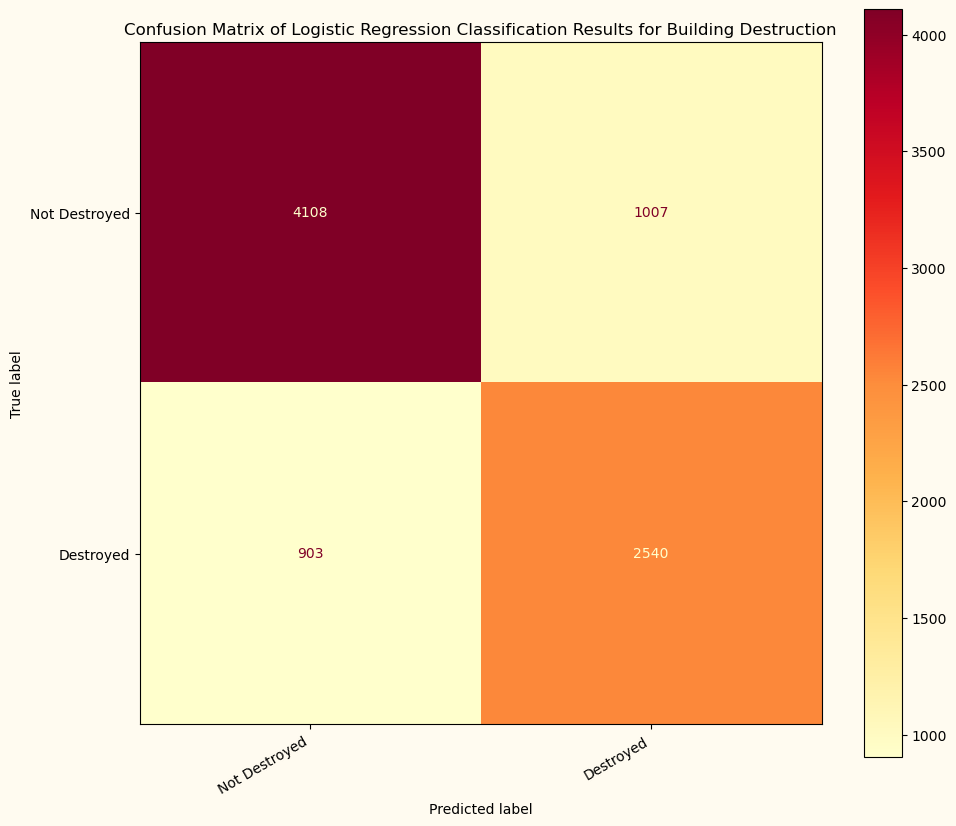

In [62]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Destroyed', 'Destroyed'])
fig, ax = plt.subplots(figsize=(11, 11), facecolor = ('#fffbf0'))
disp.plot(ax=ax, cmap='YlOrRd')
fig.autofmt_xdate()
plt.title("Confusion Matrix of Logistic Regression Classification Results for Building Destruction")
plt.show()


Display feature importances for this model:

In [63]:
from IPython.display import display

# Use feature coefficients for regression model (sum absolute value across all encodings for each feature)
# to determine feature importance
importances = np.zeros(14)
importances[0] = np.sum(np.abs(lr.coef_.flatten()[4:19]))
importances[1] = np.sum(np.abs(lr.coef_.flatten()[19:24]))
importances[2] = np.sum(np.abs(lr.coef_.flatten()[24:26]))
importances[3] = np.sum(np.abs(lr.coef_.flatten()[26:29]))
importances[4] = np.sum(np.abs(lr.coef_.flatten()[29:36]))
importances[5] = np.sum(np.abs(lr.coef_.flatten()[36:38]))
importances[6] = np.sum(np.abs(lr.coef_.flatten()[38:41]))
importances[7] = np.sum(np.abs(lr.coef_.flatten()[41:44]))
importances[8] = np.sum(np.abs(lr.coef_.flatten()[44:46]))
importances[9] = np.sum(np.abs(lr.coef_.flatten()[46:48]))
importances[10:,] = np.abs(lr.coef_.flatten()[:4])

# Create a new dataframe for feature importances across original feature columns and display it
feature_df = pd.DataFrame({'feature': original_columns[:-1], 'importance': importances})
display(feature_df)


,feature,importance
0,* Structure Type,1.229167e-01
1,* Roof Construction,7.056757e-02
2,* Eaves,1.970488e-02
3,* Vent Screen,8.077911e-02
4,* Exterior Siding,2.474219e-01
5,* Window Pane,2.280329e-02
6,* Deck/Porch On Grade,5.216017e-02
7,* Deck/Porch Elevated,3.589864e-02
8,* Patio Cover/Carport Attached to Structure,9.382794e-03
9,* Fence Attached to Structure,4.823176e-02


For this model, the most important features were latitude, longitude, exterior siding, and structure type.